# Jesús Alberto Aréchiga Carrillo

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv("dataset_RegresionLineal_MLE.csv")
y = df['y'].values

df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,-5.8598,-6.8233


In [45]:
# Definir rango de valores para mu y sigma
mu_values = np.linspace(y.min() - 2, y.max() + 2, 100)
sigma_values = np.linspace(0.5, 15, 100)

# Crear matriz para almacenar la log-verosimilitud
log_likelihood_matrix = np.zeros((len(sigma_values), len(mu_values)))

# Calcular log-verosimilitud para cada combinación de mu y sigma
n = len(y)
for i, sigma in enumerate(sigma_values):
    for j, mu in enumerate(mu_values):
        log_likelihood_matrix[i, j] = -n/2 * np.log(2 * np.pi) - n * np.log(sigma) - (1/(2*sigma**2)) * np.sum((y - mu)**2)

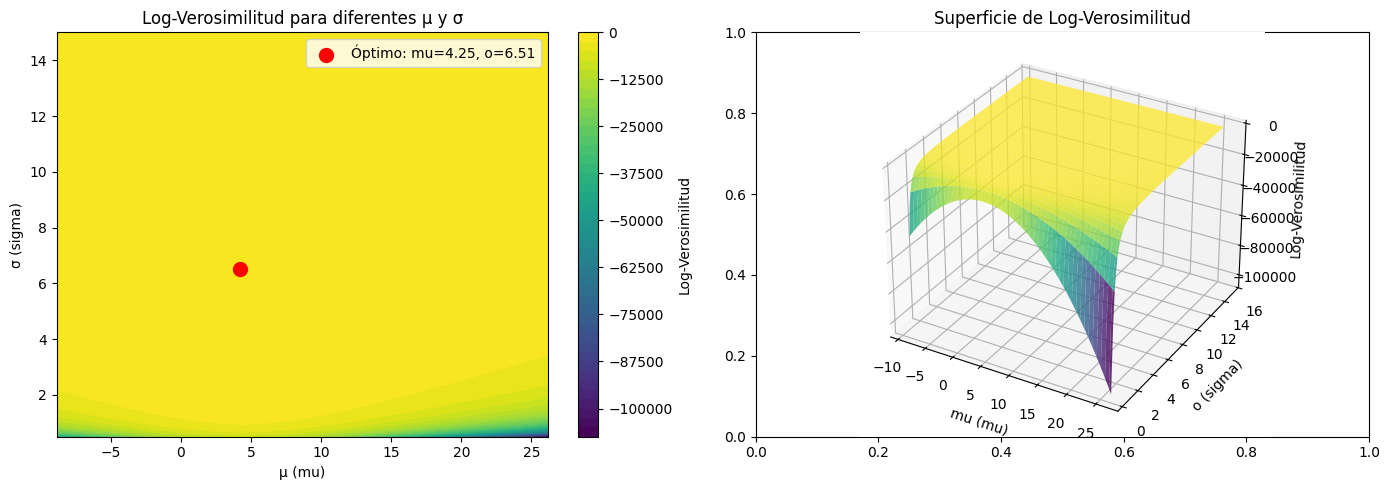

In [46]:
# Graficar la superficie de log-verosimilitud
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Mapa de calor (contorno)
MU, SIGMA = np.meshgrid(mu_values, sigma_values)
contour = axes[0].contourf(MU, SIGMA, log_likelihood_matrix, levels=50, cmap='viridis')
plt.colorbar(contour, ax=axes[0], label='Log-Verosimilitud')
axes[0].set_xlabel('μ (mu)')
axes[0].set_ylabel('σ (sigma)')
axes[0].set_title('Log-Verosimilitud para diferentes μ y σ')

# Marcar el máximo
max_idx = np.unravel_index(np.argmax(log_likelihood_matrix), log_likelihood_matrix.shape)
mu_opt_grid = mu_values[max_idx[1]]
sigma_opt_grid = sigma_values[max_idx[0]]
axes[0].scatter(mu_opt_grid, sigma_opt_grid, color='red', s=100, marker='o', label=f'Óptimo: mu={mu_opt_grid:.2f}, o={sigma_opt_grid:.2f}')
axes[0].legend()

# Gráfica 2: Superficie 3D
ax3d = fig.add_subplot(1, 2, 2, projection='3d')
ax3d.plot_surface(MU, SIGMA, log_likelihood_matrix, cmap='viridis', alpha=0.8)
ax3d.set_xlabel('mu (mu)')
ax3d.set_ylabel('o (sigma)')
ax3d.set_zlabel('Log-Verosimilitud')
ax3d.set_title('Superficie de Log-Verosimilitud')

plt.tight_layout()
plt.show()

In [47]:
# Solución analítica de MLE para distribución Normal
mu_mle = np.mean(y)
sigma_mle = np.std(y, ddof=0)  # ddof=0 para usar n en el denominador (MLE)

print("ESTIMACIÓN MLE (Solución Analítica)")
print(f"μ (mu) MLE: {mu_mle:.4f}")
print(f"σ (sigma) MLE: {sigma_mle:.4f}")

ESTIMACIÓN MLE (Solución Analítica)
μ (mu) MLE: 4.3677
σ (sigma) MLE: 6.4911


In [48]:
# Comparación con estadísticas muestrales
media_muestral = np.mean(y)
desv_std_muestral = np.std(y, ddof=0)  # MLE usa n, no n-1
desv_std_insesgada = np.std(y, ddof=1)  # Estimador insesgado usa n-1

print("COMPARACIÓN DE RESULTADOS")
print(f"\nMedia muestral:              {media_muestral:.4f}")
print(f"mu MLE:                       {mu_mle:.4f}")
print(f"Diferencia:                  {abs(media_muestral - mu_mle):.6f}")

print(f"\nDesv. estándar (MLE, n):     {desv_std_muestral:.4f}")
print(f"o MLE:                       {sigma_mle:.4f}")
print(f"Diferencia:                  {abs(desv_std_muestral - sigma_mle):.6f}")

print(f"\nDesv. estándar (insesgada, n-1): {desv_std_insesgada:.4f}")

COMPARACIÓN DE RESULTADOS

Media muestral:              4.3677
mu MLE:                       4.3677
Diferencia:                  0.000000

Desv. estándar (MLE, n):     6.4911
o MLE:                       6.4911
Diferencia:                  0.000000

Desv. estándar (insesgada, n-1): 6.5229


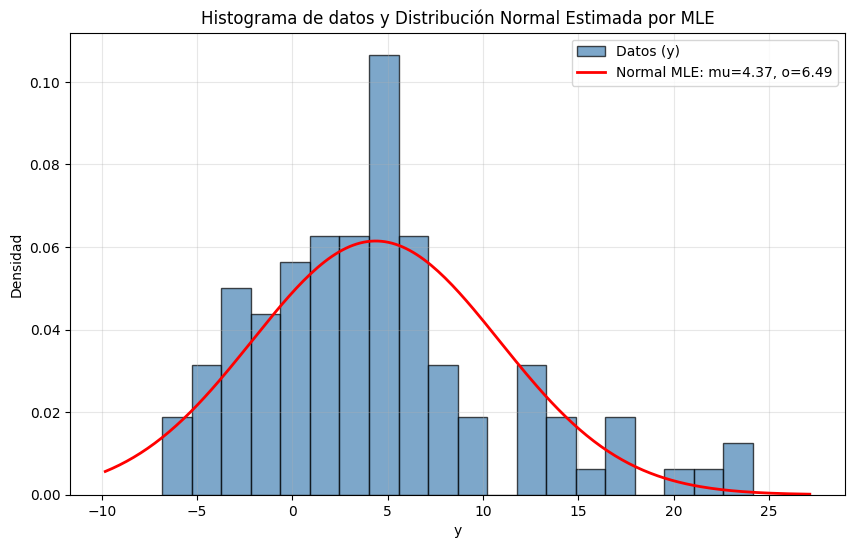


Log-verosimilitud máxima: -338.8053


In [49]:
# Gráfica final: Histograma de los datos con la distribución estimada
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(y, bins=20, density=True, alpha=0.7, color='steelblue', edgecolor='black', label='Datos (y)')

# Distribución Normal estimada
x_range = np.linspace(y.min() - 3, y.max() + 3, 200)
pdf_estimated = norm.pdf(x_range, mu_mle, sigma_mle)
plt.plot(x_range, pdf_estimated, 'r-', linewidth=2, label=f'Normal MLE: mu={mu_mle:.2f}, o={sigma_mle:.2f}')

plt.xlabel('y')
plt.ylabel('Densidad')
plt.title('Histograma de datos y Distribución Normal Estimada por MLE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nLog-verosimilitud máxima: {-n/2 * np.log(2 * np.pi) - n * np.log(sigma_mle) - (1/(2*sigma_mle**2)) * np.sum((y - mu_mle)**2):.4f}")